#1 随机数据的ROC曲线

[ 0.   0.   0.5  0.5  1. ]
[ 0.   0.5  0.5  1.   1. ]
[ 0.8  0.5  0.3  0.1]
0.75


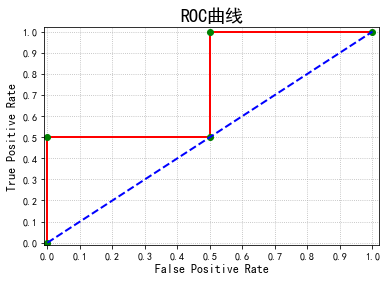

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics

y = np.array([0, 0, 1, 1])
y_pred = np.array([0.1, 0.5, 0.3, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
fpr = np.insert(fpr, 0, 0)
tpr = np.insert(tpr, 0, 0)
print(fpr)
print(tpr)
print(thresholds)
auc = metrics.auc(fpr, tpr)
print(metrics.roc_auc_score(y, y_pred))

mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(fpr, tpr, marker='o', lw=2, ls='-', mfc='g', mec='g', color='r')
plt.plot([0,1], [0,1], lw=2, ls='--', c= 'b')
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.grid(b=True, ls='dotted')
plt.title(u'ROC曲线', fontsize=18)
plt.show()

#2 随机数据的ROC与AUC曲线

[ 0.768       0.7572      0.78985     0.7729      0.77523333]
Macro AUC: 0.771683333333


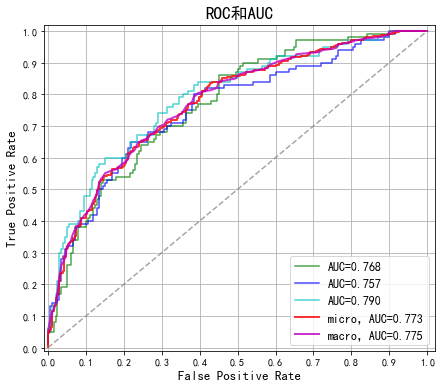

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from numpy import interp
from sklearn import metrics
from itertools import cycle

np.random.seed(0)
pd.set_option('display.width', 300)
np.set_printoptions(suppress=True)
n = 300
x = np.random.randn(n, 50)
y = np.array([0]*100+[1]*100+[2]*100)
n_class = 3

alpha = np.logspace(-3, 3, 7)
clf = LogisticRegression(penalty='l2', C=1)
clf.fit(x, y)
y_score = clf.decision_function(x)
y = label_binarize(y, classes=np.arange(n_class))
colors = cycle('gbc')
fpr = dict()
tpr = dict()
auc = np.empty(n_class+2)
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 6), facecolor='w')
for i, color in zip(np.arange(n_class), colors):
    fpr[i], tpr[i], thresholds = metrics.roc_curve(y[:, i], y_score[:, i])
    auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], c=color, lw=1.5, alpha=0.7, label=u'AUC=%.3f' % auc[i])
# micro
fpr['micro'], tpr['micro'], thresholds = metrics.roc_curve(y.ravel(), y_score.ravel())
auc[n_class] = metrics.auc(fpr['micro'], tpr['micro'])
plt.plot(fpr['micro'], tpr['micro'], c='r', lw=2, ls='-', alpha=0.8, label=u'micro，AUC=%.3f' % auc[n_class])
# macro
fpr['macro'] = np.unique(np.concatenate([fpr[i] for i in np.arange(n_class)]))
tpr_ = np.zeros_like(fpr['macro'])
for i in np.arange(n_class):
    tpr_ += interp(fpr['macro'], fpr[i], tpr[i])
tpr_ /= n_class
tpr['macro'] = tpr_
auc[n_class+1] = metrics.auc(fpr['macro'], tpr['macro'])
print(auc)
print('Macro AUC:', metrics.roc_auc_score(y, y_score, average='macro'))
plt.plot(fpr['macro'], tpr['macro'], c='m', lw=2, alpha=0.8, label=u'macro，AUC=%.3f' % auc[n_class+1])
plt.plot((0, 1), (0, 1), c='#808080', lw=1.5, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True)
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
# plt.legend(loc='lower right', fancybox=True, framealpha=0.8, edgecolor='#303030', fontsize=12)
plt.title(u'ROC和AUC', fontsize=17)
plt.show()

#3 鸢尾花数据不同分类器的ROC和AUC

       0    1
0    5.1  3.5
1    4.9  3.0
2    4.7  3.2
3    4.6  3.1
4    5.0  3.6
5    5.4  3.9
6    4.6  3.4
7    5.0  3.4
8    4.4  2.9
9    4.9  3.1
10   5.4  3.7
11   4.8  3.4
12   4.8  3.0
13   4.3  3.0
14   5.8  4.0
15   5.7  4.4
16   5.4  3.9
17   5.1  3.5
18   5.7  3.8
19   5.1  3.8
20   5.4  3.4
21   5.1  3.7
22   4.6  3.6
23   5.1  3.3
24   4.8  3.4
25   5.0  3.0
26   5.0  3.4
27   5.2  3.5
28   5.2  3.4
29   4.7  3.2
..   ...  ...
120  6.9  3.2
121  5.6  2.8
122  7.7  2.8
123  6.3  2.7
124  6.7  3.3
125  7.2  3.2
126  6.2  2.8
127  6.1  3.0
128  6.4  2.8
129  7.2  3.0
130  7.4  2.8
131  7.9  3.8
132  6.4  2.8
133  6.3  2.8
134  6.1  2.6
135  7.7  3.0
136  6.3  3.4
137  6.4  3.1
138  6.0  3.0
139  6.9  3.1
140  6.7  3.1
141  6.9  3.1
142  5.8  2.7
143  6.8  3.2
144  6.7  3.3
145  6.7  3.0
146  6.3  2.5
147  6.5  3.0
148  6.2  3.4
149  5.9  3.0

[150 rows x 2 columns]
0.877083333333


[ 2.06913808  2.06913808  0.11288379]
0.890972222222


{'C': 0.11288378916846889}
0.880694444444


{'gamma': 0.48329302385717521, 'C': 0.18329807108324356}
0.892361111111


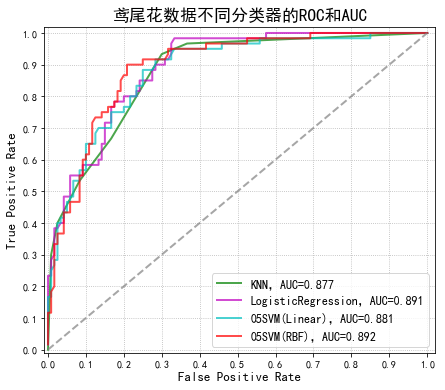

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from itertools import cycle

np.random.seed(0)
pd.set_option('display.width', 300)
np.set_printoptions(suppress=True)
data = pd.read_csv('data/iris.data', header=None)
iris_types = data[4].unique()
for i, iris_type in enumerate(iris_types):
    data.set_value(data[4] == iris_type, 4, i)
x = data.iloc[:, :2]
n, features = x.shape
print(x)
y = data.iloc[:, -1].astype(np.int)
c_number = np.unique(y).size
x, x_test, y, y_test = train_test_split(x, y, train_size=0.6, random_state=0)
y_one_hot = label_binarize(y_test, classes=np.arange(c_number))
alpha = np.logspace(-2, 2, 20)
models = [
    ['KNN', KNeighborsClassifier(n_neighbors=7)],
    ['LogisticRegression', LogisticRegressionCV(Cs=alpha, penalty='l2', cv=3)],
    ['05SVM(Linear)', GridSearchCV(SVC(kernel='linear', decision_function_shape='ovr'), param_grid={'C': alpha})],
    ['05SVM(RBF)', GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid={'C': alpha, 'gamma': alpha})]]
colors = cycle('gmcr')
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 6), facecolor='w')
for (name, model), color in zip(models, colors):
    model.fit(x, y)
    if hasattr(model, 'C_'):
        print(model.C_)
    if hasattr(model, 'best_params_'):
        print(model.best_params_)
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(x_test)
    else:
        y_score = model.decision_function(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(), y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print(auc)
    plt.plot(fpr, tpr, c=color, lw=2, alpha=0.7, label=u'%s，AUC=%.3f' % (name, auc))
plt.plot((0, 1), (0, 1), c='#808080', lw=2, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
# plt.legend(loc='lower right', fancybox=True, framealpha=0.8, edgecolor='#303030', fontsize=12)
plt.title(u'鸢尾花数据不同分类器的ROC和AUC', fontsize=17)
plt.show()

#4 汽车数据的ROC和AUC曲线

     buy maintain doors persons   boot safety accept
0  vhigh    vhigh     2       2  small    low  unacc
1  vhigh    vhigh     2       2  small    med  unacc
2  vhigh    vhigh     2       2  small   high  unacc
3  vhigh    vhigh     2       2    med    low  unacc
4  vhigh    vhigh     2       2    med    med  unacc
5  vhigh    vhigh     2       2    med   high  unacc
6  vhigh    vhigh     2       2    big    low  unacc
7  vhigh    vhigh     2       2    big    med  unacc
8  vhigh    vhigh     2       2    big   high  unacc
9  vhigh    vhigh     2       4  small    low  unacc
   buy_high  buy_low  buy_med  buy_vhigh  maintain_high  maintain_low  maintain_med  maintain_vhigh  doors_2  doors_3  doors_4  doors_5more  persons_2  persons_4  persons_more  boot_big  boot_med  boot_small  safety_high  safety_low  safety_med
0         0        0        0          1              0             0             0               1        1        0        0            0          1          0           

[   10.  1000.    10.   100.]
训练集精确度： 0.91894127378
测试集精确度： 0.884393063584
Micro AUC:	 0.988121269721
Micro AUC(System):	 0.988121269721
Macro AUC:	 0.982014074747


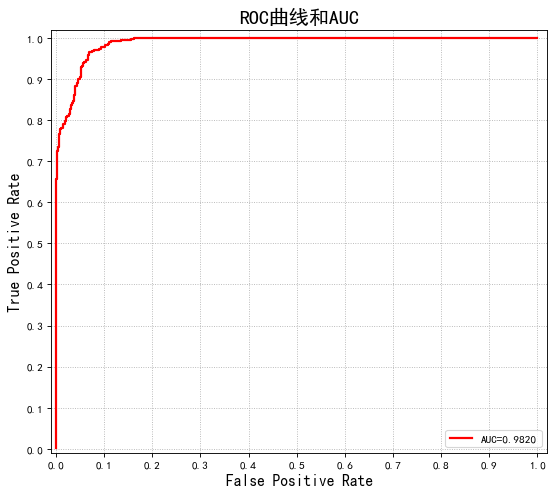

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.width', 300)
pd.set_option('display.max_columns', 300)

data = pd.read_csv('data/car.data', header=None)
n_columns = len(data.columns)
columns = ['buy', 'maintain', 'doors', 'persons', 'boot', 'safety', 'accept']
new_columns = dict(zip(np.arange(n_columns), columns))
data.rename(columns=new_columns, inplace=True)
print(data.head(10))

# one-hot编码
x = pd.DataFrame()
for col in columns[:-1]:
    t = pd.get_dummies(data[col])
    t = t.rename(columns=lambda x: col+'_'+str(x))
    x = pd.concat((x, t), axis=1)
print(x.head(10))
# print x.columns
y = pd.Categorical(data['accept']).codes

x, x_test, y, y_test = train_test_split(x, y, train_size=0.7)
clf = LogisticRegressionCV(Cs=np.logspace(-3, 4, 8), cv=5)
clf.fit(x, y)
print(clf.C_)
y_hat = clf.predict(x)
print('训练集精确度：', metrics.accuracy_score(y, y_hat))
y_test_hat = clf.predict(x_test)
print('测试集精确度：', metrics.accuracy_score(y_test, y_test_hat))
n_class = len(data['accept'].unique())
y_test_one_hot = label_binarize(y_test, classes=np.arange(n_class))
y_test_one_hot_hat = clf.predict_proba(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test_one_hot.ravel(), y_test_one_hot_hat.ravel())
print('Micro AUC:\t', metrics.auc(fpr, tpr))
print('Micro AUC(System):\t', metrics.roc_auc_score(y_test_one_hot, y_test_one_hot_hat, average='micro'))
auc = metrics.roc_auc_score(y_test_one_hot, y_test_one_hot_hat, average='macro')
print('Macro AUC:\t', auc)

mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8, 7), dpi=80, facecolor='w')
plt.plot(fpr, tpr, 'r-', lw=2, label='AUC=%.4f' % auc)
plt.legend(loc='lower right')
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.grid(b=True, ls=':')
plt.title(u'ROC曲线和AUC', fontsize=18)
plt.show()